# 总结

以下模型都是基准模型，经过优化后准确率可以进一步提升。

模型的准确率以是以 "Outputs14" 列的 14 类为标准进行计算。

|模型名称|准确率|可解释性|
|-|-|-|
|决策树|23%|强|
|随机森林|33%|弱|
|支持向量机|17%|一般|
|K近邻|32%|强|
|前馈神经网络||很弱|

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_fram = pd.read_csv('Road_data_small.csv')
# 查看数据前 5 行
data_fram.head()

,dates,OBJs,ODs_1,ODs_2,depTimes,expPerf,staticPerf,grdyPerf,godPerf,distances,...,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14,Outputs7,Outputs3_1,Outputs3_2,Outputs3_3
0,4.19,1,1386,1821,16454,901.873155,943.341039,879.878944,802.674362,0.089257,...,0.475829,999.074209,955.166635,997.787702,986.738929,13,6,-1,0,-1
1,4.19,1,529,1199,14062,905.320230,650.077643,650.077643,650.077643,0.053294,...,0.550532,667.675168,585.119637,655.264699,585.119637,2,2,1,1,-1
2,4.19,1,716,990,13779,787.775655,864.166706,925.812156,767.183548,0.080272,...,0.756983,612.851744,601.668111,975.484821,700.256755,14,7,-1,-1,0
3,4.19,1,547,1456,14027,625.313098,683.213117,670.375942,623.874198,0.063568,...,0.512717,670.883400,641.749020,670.883400,641.749020,14,7,-1,-1,0
4,4.19,1,914,1073,14355,604.748398,618.476141,620.277530,595.945774,0.047176,...,0.289439,590.331899,590.331899,657.448103,611.118098,14,7,-1,-1,0


In [3]:
data_fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 135 entries, dates to Outputs3_3
dtypes: float64(122), int64(13)
memory usage: 1.0 MB


In [4]:
# 查看每个类别数量
data_fram['Outputs14'].value_counts()

14    235
13    211
12     94
1      88
7      84
6      68
4      40
2      33
8      30
10     29
11     27
9      23
5      22
3      16
Name: Outputs14, dtype: int64

In [5]:
# 查看数据统计信息
data_fram.describe()

,dates,OBJs,ODs_1,ODs_2,depTimes,expPerf,staticPerf,grdyPerf,godPerf,distances,...,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14,Outputs7,Outputs3_1,Outputs3_2,Outputs3_3
count,1000.00,1000.0,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,4.19,1.0,989.667000,893.752000,22805.76900,935.995537,966.718164,947.174648,887.550153,0.075971,...,0.571629,1066.235173,982.711827,1240.796789,1051.146957,9.663000,5.12000,-0.354000,-0.145000,-0.133000
std,0.00,0.0,554.701043,514.944835,9123.07642,428.929747,452.017414,447.386582,402.973739,0.038196,...,0.359378,515.947467,460.865169,2932.655544,513.709204,4.468714,2.04543,0.739751,0.763255,0.756229
min,4.19,1.0,7.000000,1.000000,10809.00000,108.708632,111.051103,108.708632,108.708632,0.008163,...,0.147734,93.210676,93.210676,104.363975,107.335254,1.000000,1.00000,-1.000000,-1.000000,-1.000000
25%,4.19,1.0,553.750000,467.000000,13938.00000,631.604477,656.431279,626.029221,603.050112,0.049229,...,0.337784,674.744978,640.934651,694.448326,671.238656,6.000000,4.00000,-1.000000,-1.000000,-1.000000
50%,4.19,1.0,1021.500000,866.500000,28820.50000,890.878961,914.770427,895.029201,843.079786,0.071013,...,0.459292,1003.470089,938.611832,1050.870862,992.546423,12.000000,6.00000,-1.000000,0.000000,0.000000
75%,4.19,1.0,1477.000000,1265.000000,31453.00000,1214.153390,1249.465184,1236.861254,1146.164283,0.099965,...,0.679782,1388.116988,1268.955229,1448.698334,1374.698499,13.000000,7.00000,0.000000,0.000000,0.000000
max,4.19,1.0,1902.000000,1895.000000,46811.00000,2428.156438,2778.882886,2619.824412,2227.147165,0.195956,...,3.216550,3112.732272,2527.853696,65535.000000,2872.377094,14.000000,7.00000,1.000000,1.000000,1.000000


In [6]:
# 删除多余分类标准，以Output14 为分类标准
data_fram.drop(['Outputs7','Outputs3_1','Outputs3_2','Outputs3_3'],axis=1,inplace=True)
data_fram.head()

,dates,OBJs,ODs_1,ODs_2,depTimes,expPerf,staticPerf,grdyPerf,godPerf,distances,...,stmutC_godPath_2,stmutC_godPath_3,stmutC_grdyPath_1,stmutC_grdyPath_2,stmutC_grdyPath_3,YesterdayGrdyPerf,YesterdayGodPerf,YesterdayStaPerf,YesterdayExpPerf,Outputs14
0,4.19,1,1386,1821,16454,901.873155,943.341039,879.878944,802.674362,0.089257,...,0.351260,0.375762,0.364747,0.549073,0.475829,999.074209,955.166635,997.787702,986.738929,13
1,4.19,1,529,1199,14062,905.320230,650.077643,650.077643,650.077643,0.053294,...,0.695624,1.324165,0.361206,0.330961,0.550532,667.675168,585.119637,655.264699,585.119637,2
2,4.19,1,716,990,13779,787.775655,864.166706,925.812156,767.183548,0.080272,...,0.204695,0.282782,0.688928,0.337305,0.756983,612.851744,601.668111,975.484821,700.256755,14
3,4.19,1,547,1456,14027,625.313098,683.213117,670.375942,623.874198,0.063568,...,0.504697,1.106281,0.873314,0.657867,0.512717,670.883400,641.749020,670.883400,641.749020,14
4,4.19,1,914,1073,14355,604.748398,618.476141,620.277530,595.945774,0.047176,...,0.333263,0.289439,0.316965,0.333263,0.289439,590.331899,590.331899,657.448103,611.118098,14


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

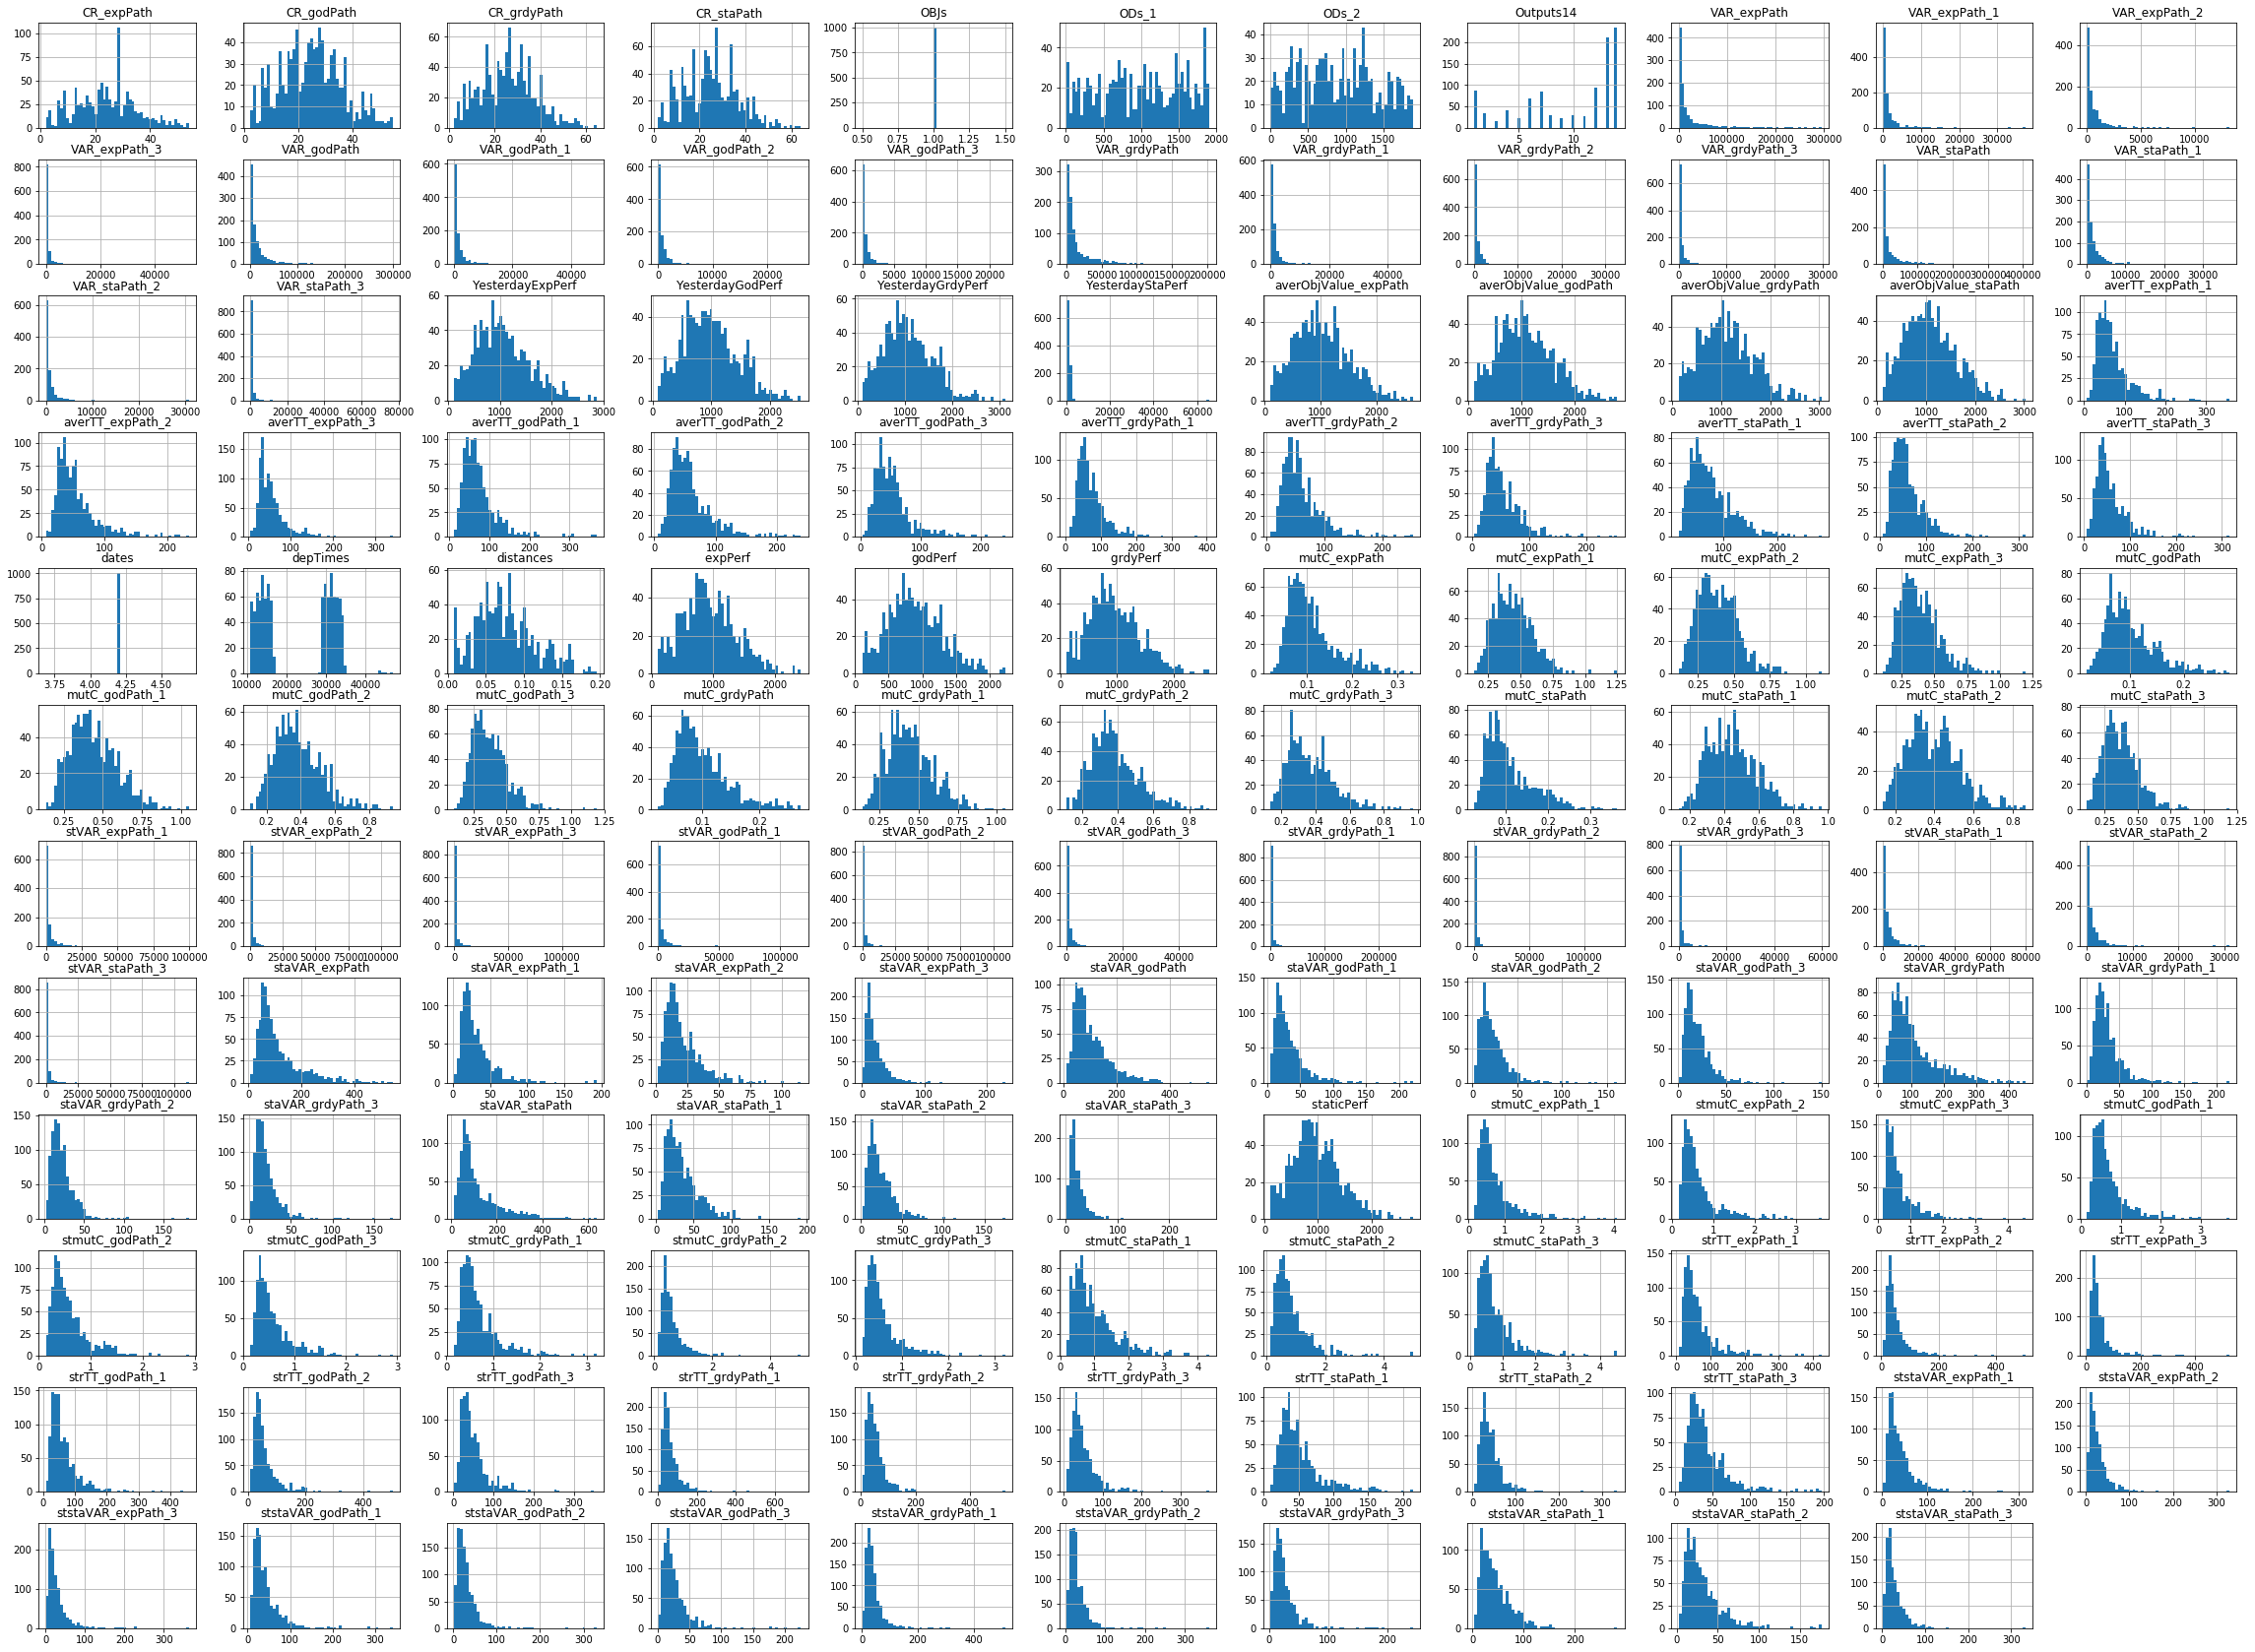

In [8]:
# 查看·每列数据分布和列与列的关系
data_fram.hist(bins=50,figsize=(40,30))
plt.show()

In [9]:
# 查看属性与分类模型的关系
corr_matrix = data_fram.corr()
corr_matrix['Outputs14'].sort_values(ascending=False)

Outputs14                1.000000
CR_staPath               0.480521
CR_expPath               0.466503
staticPerf               0.463612
CR_godPath               0.459361
grdyPerf                 0.451617
expPerf                  0.450800
CR_grdyPath              0.447296
godPerf                  0.421367
averObjValue_staPath     0.414319
averObjValue_godPath     0.391352
averObjValue_expPath     0.387743
averObjValue_grdyPath    0.383425
YesterdayGodPerf         0.375827
YesterdayGrdyPerf        0.371766
YesterdayExpPerf         0.366045
distances                0.365799
staVAR_godPath           0.165661
staVAR_staPath           0.136089
strTT_grdyPath_3         0.125962
staVAR_grdyPath          0.120050
YesterdayStaPerf         0.116560
staVAR_expPath           0.114818
VAR_godPath              0.108187
staVAR_staPath_2         0.104474
mutC_staPath_2           0.097315
VAR_staPath              0.089367
ststaVAR_staPath_1       0.087257
ststaVAR_staPath_2       0.087208
averTT_staPath

In [10]:
# 转换数据类型
data_numpy_ndarray = data_fram.as_matrix()

D:\Anaconda3\envs\machinelearn\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


# 深度学习技术

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

D:\Anaconda3\envs\machinelearn\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [32]:
# prepare model data
X = data_numpy_ndarray[:,9:130].astype(float)
Y = data_numpy_ndarray[:,130].astype(int)

In [33]:
# 因为计算机计数是从零开始，而原始数据分类是从 1 开始
# 所以所有类别减去 1
Y = Y - 1 
Y[0]

12

In [34]:
# encode class values as integers
#encoder = LabelEncoder()
#encoded_Y = encoder.fit_transform(Y)
# convert integers to dummy variables (one hot encoding)
encoded_Y = Y
dummy_y = np_utils.to_categorical(encoded_Y)

In [35]:
dummy_y[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

## 使用前馈神经网络模型

In [36]:
# splitting data into training set and test set. If random_state is set to an integer, the split datasets are fixed.
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=0)

In [37]:
from sklearn.preprocessing import StandardScaler
standar_s = StandardScaler()
# 特征标准化
X_train_std = standar_s.fit_transform(X_train)
X_test_std = standar_s.fit_transform(X_test)

In [38]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras.layers import Activation
def baseline_model():
    model = Sequential()
    model.add(Dense(units=1024,input_dim=121))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(units=512))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(units=64))
    model.add(BatchNormalization())
    model.add(Activation('tanh'))
    model.add(Dense(units=14))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [39]:
a_model = baseline_model()

In [40]:
#a_model.fit(X_train_std, Y_train, epochs=100, batch_size=256,verbose=1,shuffle=True)

In [41]:
# 增加验证集模式，会减慢训练的速度
a_model.fit(X_train_std, Y_train, epochs=10, batch_size=256,verbose=1,validation_split=0.2,shuffle=True)

Train on 560 samples, validate on 140 samples
Epoch 1/10
560/560 [==============================] - 2s 3ms/step - loss: 0.7981 - acc: 0.5022 - val_loss: 0.8241 - val_acc: 0.5214
Epoch 2/10
560/560 [==============================] - 0s 184us/step - loss: 0.7666 - acc: 0.5420 - val_loss: 0.8124 - val_acc: 0.5281
Epoch 3/10
560/560 [==============================] - 0s 182us/step - loss: 0.7571 - acc: 0.5393 - val_loss: 0.8081 - val_acc: 0.5306
Epoch 4/10
560/560 [==============================] - 0s 184us/step - loss: 0.7479 - acc: 0.5486 - val_loss: 0.8008 - val_acc: 0.5306
Epoch 5/10
560/560 [==============================] - 0s 184us/step - loss: 0.7409 - acc: 0.5482 - val_loss: 0.7892 - val_acc: 0.5423
Epoch 6/10
560/560 [==============================] - 0s 180us/step - loss: 0.7367 - acc: 0.5569 - val_loss: 0.7783 - val_acc: 0.5541
Epoch 7/10
560/560 [==============================] - 0s 182us/step - loss: 0.7294 - acc: 0.5611 - val_loss: 0.7660 - val_acc: 0.5607
Epoch 8/10
560/560

In [42]:
a_model.evaluate(X_test_std,Y_test)

300/300 [==============================] - 0s 327us/step


[0.7462612048784891, 0.5664285771052042]

# 使用传统机器学习方法

In [43]:
X.shape

(1000, 121)

In [44]:
Y.reshape(-1,1)
Y.shape

(1000,)

In [45]:
dummy_y.shape

(1000, 14)

In [46]:
from sklearn.model_selection import train_test_split
# 准备好数据
X_train, X_test, y_train, y_test =  train_test_split(X,Y,test_size=0.2, random_state=0) 

In [47]:
X_train.shape

(800, 121)

In [48]:
y_train.shape

(800,)

## 使用决策树

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
tree_clf = DecisionTreeClassifier()

In [51]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
tree_clf.score(X_test, y_test)

0.555

## 使用随机森林

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rnd_clf = RandomForestClassifier(n_estimators=20, min_samples_split=100,max_depth=14,n_jobs=-1)

In [55]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
rnd_clf.score(X_test,y_test)

0.355

In [57]:
rnd_clf.score(X_train,y_train)

0.42625

## 支持向量机

In [58]:
from sklearn.svm import SVC, LinearSVC

In [59]:
lin_clf = LinearSVC(loss="hinge", C=100, random_state=42)

In [60]:
lin_clf.fit(X_train,y_train)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0)

In [61]:
lin_clf.score(X_test,y_test)

0.16

## K近邻算法

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
KNN = KNeighborsClassifier(n_neighbors=100, algorithm='ball_tree',n_jobs=-1).fit(X_train,y_train)

In [64]:
KNN.score(X_test,y_test)

0.22